<a href="https://colab.research.google.com/github/summerolmstead/cpen4700/blob/main/Assignment3Olmstead4700.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summer Olmstead**

CPEN4700

Assignment 3

*Pipeline processor without branch prediction Formula:*

**Pb** = probability of any instruction being a branch

**Cb** = the average number of cycles per branch instruction

**Cnb** = the average number of cycles per nonbranching instruction


Average Number of clock cycles per instruction is given by:
**C_Avg = Pb*Cb + (1-Pb)*Cnb **


Now in a pipeline processir nonbranch instructions execute in one clock cycle so **Cnb = 1**. Formula for Cb needs the following info:


**Pt** = Probability branch is taken


**(1-Pt)** = Probability branch is not taken


**b** = branch pentalty in clock cycles


Therefore, **Cb = pt(1+b)+(1-pt)(1)= 1+pt*b**


Can sub this into C_Avg! This makes C_Avg w/o branch prediction become:

** C_Avg_WBP = pb(1+pt*b)+(1-Pb) = 1 + Pb*Pt*b **


Finally, the throughput of the pipeline is the reciprocal of the average number of clock cycles per instruction so -->


** H = 1/C_Avg = 1/(1+ (Pb*Pt*b)) **




Part A: Investigate the effects of varying Pb, Pt, and b (the probabilty of a given instruction being a branch, the probabilty of a branch being taken, and the branch penalty in clock cycles) on the performance of a pipeline without branch prediction. Your investigation should consider a range of values for each parameter, covering at least the ranges of 0.2 to 0.3 for Pb, 0.5 to 0.7 for Pt, and b = 3 to 4 clock cycles. You may go beyond these ranges, and are encouraged to do so if you spot any interesting trends in the data. Within each range, be sure to simulate several intermediate values of the parameter in question in order to get enough data points to produce meaningful graphs. [Note: Bar graphs, pie charts, etc. are not appropriate to illustrate trends in this type of data. A good layout here would have cycles/instruction or throughput on the vertical axis vs. Pb on the horizontal axis. Graphing series of data for various values of Pt should give you a "family of curves" for each value of b. Make tables and graphs of your data for cycles/instruction and pipeline throughput. Thoroughly analyze and discuss your results, noting (and making your best attempt to explain) anything that appears particularly significant or interesting.

Results Table:
       Pb    Pt  b  C_Avg_WBP  Throughput
0   0.200  0.50  3    1.30000    0.769231
1   0.200  0.55  3    1.33000    0.751880
2   0.200  0.60  3    1.36000    0.735294
3   0.200  0.65  3    1.39000    0.719424
4   0.200  0.70  3    1.42000    0.704225
5   0.225  0.50  3    1.33750    0.747664
6   0.225  0.55  3    1.37125    0.729262
7   0.225  0.60  3    1.40500    0.711744
8   0.225  0.65  3    1.43875    0.695048
9   0.225  0.70  3    1.47250    0.679117
10  0.250  0.50  3    1.37500    0.727273
11  0.250  0.55  3    1.41250    0.707965
12  0.250  0.60  3    1.45000    0.689655
13  0.250  0.65  3    1.48750    0.672269
14  0.250  0.70  3    1.52500    0.655738
15  0.275  0.50  3    1.41250    0.707965
16  0.275  0.55  3    1.45375    0.687876
17  0.275  0.60  3    1.49500    0.668896
18  0.275  0.65  3    1.53625    0.650936
19  0.275  0.70  3    1.57750    0.633914
20  0.300  0.50  3    1.45000    0.689655
21  0.300  0.55  3    1.49500    0.668896
22  0.300  0.60  3 

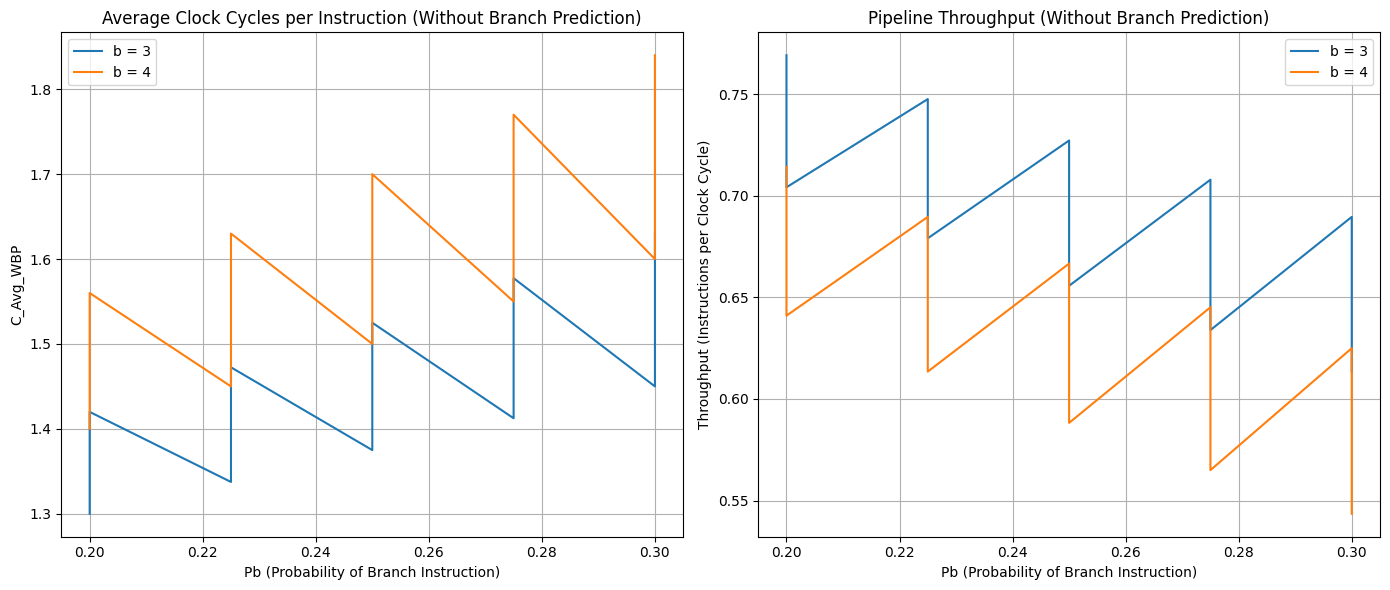

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#defining assignment requirements for subbing formulas
Pb_values = np.linspace(0.2, 0.3, num=5)  #branch instruction probability
Pt_values = np.linspace(0.5, 0.7, num=5)  #branch taken probability
b_values = [3, 4]  #branch penalty in clock cycles

#initalizing to store results
results = []

#calculate cycles/instruction and throughput WITHOUT branch prediction
for b in b_values:
    for Pb in Pb_values:
        for Pt in Pt_values:
            #cb calculation  -> Cb = 1+pt*b
            Cb = 1+(Pt*b)
            #average clock cycles per instruction w/o bp . -> C_Avg_wBP 1 + Pb*Pt*b
            C_Avg_WBP = 1 + (Pb*Pt*b)
            #calculating thrroughput just reciprocal of C_AVG_WBP
            throughput = 1/C_Avg_WBP

            results.append((Pb, Pt, b, C_Avg_WBP, throughput))

#df bc its easier to showcase visually and loop over with
results_df = pd.DataFrame(results, columns=['Pb', 'Pt', 'b', 'C_Avg_WBP', 'Throughput'])

#showing table just by printing results of df
print("Results Table:")
print(results_df)

#plotting graph now
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for b in b_values:   #shows each b value output
    subset = results_df[results_df['b'] == b]
    plt.plot(subset['Pb'], subset['C_Avg_WBP'], label=f'b = {b}')
plt.title('Average Clock Cycles per Instruction (Without Branch Prediction)')
plt.xlabel('Pb (Probability of Branch Instruction)')
plt.ylabel('C_Avg_WBP')
plt.legend()
plt.grid()

#throughput plot
plt.subplot(1, 2, 2)
for b in b_values:
    subset = results_df[results_df['b'] == b]
    plt.plot(subset['Pb'], subset['Throughput'], label=f'b = {b}')
plt.title('Pipeline Throughput (Without Branch Prediction)')
plt.xlabel('Pb (Probability of Branch Instruction)')
plt.ylabel('Throughput (Instructions per Clock Cycle)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

These results make sense as on the left we have the average clock cycles per instructions w/o branch prediction and the reciprocal of that is the throughput and we see an opposite trending graph for throughput so this is accurate for what we are looking for. For the average clock cycles per instruction we see that when b=4 we have higher averages as the probability of branch instruction increases over time. Moreover, we see in the throughput the b=3 decreasing over time as the probability of branch instruction increases, but still higher than b=4. The trend for this shape is very jagged and specific with almost parallelograms occuring with the top or bottom when b=3 or 4. The trend lines are almost spiking up then coming to a linear end before going up again and restarting the process.

**Scenario for Branch Prediction Scheme: **

**Pc** = probability of correct prediction

**c** = reduced penalty associated with correctly predicted branch

branches incorrectly predicted incur full branch penalty of **b** cycles.

Avg Number of cycles per branch instruction in branch prediction scheme:

** Cb = 1 + b - Pc*b + Pt*Pc*c **

W/ Branch Prediction Avg Cycles/Instruction:

**C_Avg_BP = 1 + Pb*b - Pb*Pc*b + Pb*Pt*Pc*c **

Results Table:
     Pc  c  C_Avg_BP  Throughput
0   0.4  0     1.600    0.625000
1   0.5  0     1.500    0.666667
2   0.6  0     1.400    0.714286
3   0.7  0     1.300    0.769231
4   0.8  0     1.200    0.833333
5   0.4  1     1.660    0.602410
6   0.5  1     1.575    0.634921
7   0.6  1     1.490    0.671141
8   0.7  1     1.405    0.711744
9   0.8  1     1.320    0.757576
10  0.4  2     1.720    0.581395
11  0.5  2     1.650    0.606061
12  0.6  2     1.580    0.632911
13  0.7  2     1.510    0.662252
14  0.8  2     1.440    0.694444


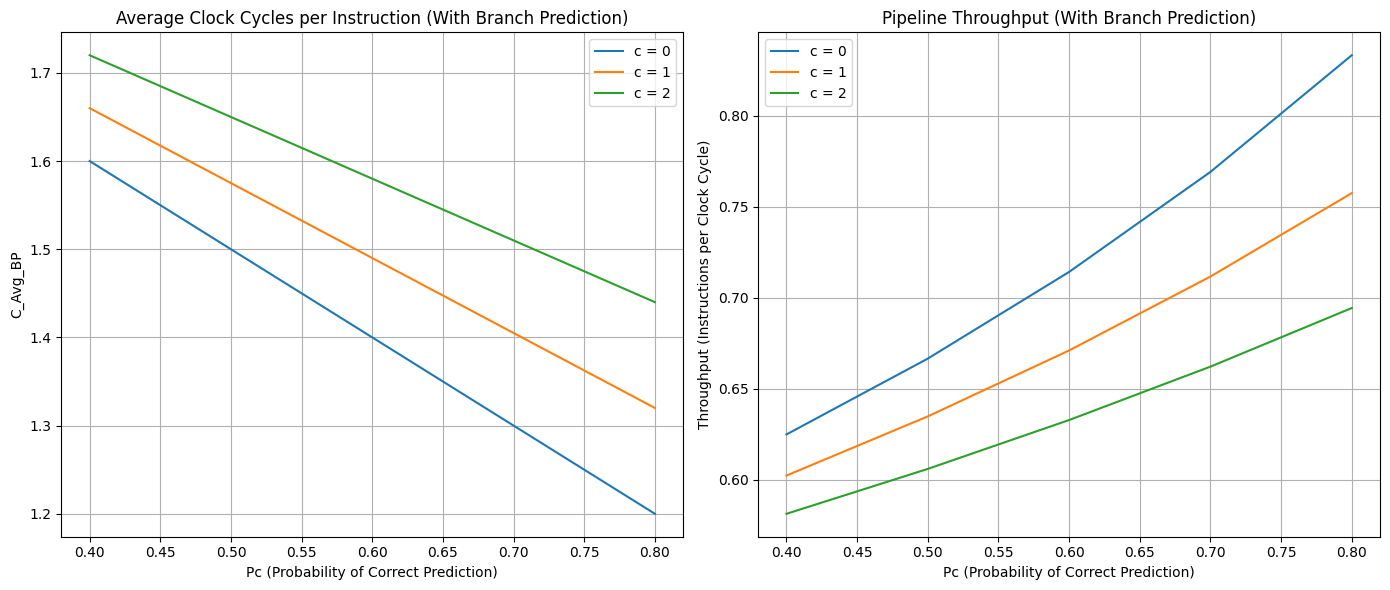

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#defining given info
Pb = 0.25  #branch instruction prob
Pt = 0.60  #branch is taken prob
b = 4  #branch penalty in b clock cycles

#ranges for Pc and c
Pc_values = np.linspace(0.4, 0.8, num=5) #correct prediction prob
c_values = [0, 1, 2] #reduced penalty for correct prediction

results2 = []

#calculating cycles/instruction and throughput with branch prediction
for c in c_values:
    for Pc in Pc_values:
        #Cb formula for c_avg_bp -> Cb = 1 + b - Pc*b + Pt*Pc*c
        Cb = 1+b-(Pc*b)+(Pt*Pc*c)
        #average clock cycles per instruction -> C_Avg_BP = 1 + Pb*b - Pb*Pc*b + Pb*Pt*Pc*c
        C_Avg_BP = 1+(Pb*b)-(Pb*Pc*b)+(Pb*Pt*Pc*c)
        #throughput
        throughput2 = 1/C_Avg_BP

        results2.append((Pc, c, C_Avg_BP, throughput2))

results2_df = pd.DataFrame(results2, columns=['Pc', 'c', 'C_Avg_BP', 'Throughput'])

#results in a table form just by printing df
print("Results Table:")
print(results2_df)

#plotting same like before
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for c in c_values:
    subset = results2_df[results2_df['c'] == c]
    plt.plot(subset['Pc'], subset['C_Avg_BP'], label=f'c = {c}')
plt.title('Average Clock Cycles per Instruction (With Branch Prediction)')
plt.xlabel('Pc (Probability of Correct Prediction)')
plt.ylabel('C_Avg_BP')
plt.legend()
plt.grid()


plt.subplot(1, 2, 2)
for c in c_values:
    subset = results2_df[results2_df['c'] == c]
    plt.plot(subset['Pc'], subset['Throughput'], label=f'c = {c}')
plt.title('Pipeline Throughput (With Branch Prediction)')
plt.xlabel('Pc (Probability of Correct Prediction)')
plt.ylabel('Throughput (Instructions per Clock Cycle)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Again we see the left being  the average clock cycles per instruction and the right being throughput and as they are reciprocals we see them being opposites.For average clock cyles we see the higher the c value is the higher the clock cycles per instruction average is as the probability of correct prediction increases over time. We see the same general concept in the throughput with as the lower c value is the higher the throughput will be as the probability of correct prediction increases. We see that these trends are linear relationships.